## EDA and visuals
#### Use 'data/lemmatized_and_sentiment_tweets.csv'


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
%matplotlib inline

In [2]:
df = pd.read_csv('data/lemmatized_and_sentiment_tweets.csv')

In [3]:
df.head()

,Unnamed: 0,tweet,product_,emotion,lemmatizer_tweets,textblob_polarity,textblob_subjectivity,vs_neg,vs_neu,vs_pos,vs_compound
0,0,"['wesley83', 'have', '3G', 'iPhone', '3', 'hrs...",iPhone,0,wesley83 have 3G iPhone 3 hr tweeting RISE Aus...,-0.200000,0.400000,0.223,0.777,0.000,-0.6486
1,1,"['jessedee', 'Know', 'fludapp', 'Awesome', 'iP...",iPad or iPhone App,1,jessedee Know fludapp Awesome iPad iPhone app ...,0.466667,0.933333,0.000,0.528,0.472,0.9100
2,2,"['swonderlin', 'not', 'wait', 'iPad', '2', 'al...",iPad,1,swonderlin not wait iPad 2 also should sale do...,-0.155556,0.288889,0.000,1.000,0.000,0.0000
3,3,"['sxsw', 'hope', 'year', 'festival', 't', 'cra...",iPad or iPhone App,0,sxsw hope year festival t crashy this year iPh...,0.000000,0.000000,0.000,0.596,0.404,0.7269
4,4,"['sxtxstate', 'great', 'stuff', 'Fri', 'SXSW',...",Google,1,sxtxstate great stuff Fri SXSW Marissa Mayer G...,0.800000,0.750000,0.000,0.796,0.204,0.6249


In [4]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

#### Chart of number of tweets by product

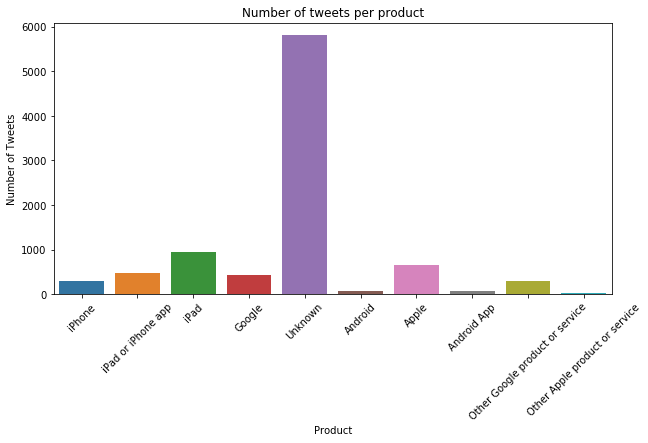

In [5]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='product_', data=df)
chart.set_xticklabels(labels=['iPhone','iPad or iPhone app','iPad','Google','Unknown',
 'Android','Apple','Android App','Other Google product or service','Other Apple product or service'], rotation=45);
chart.set_xlabel('Product');
chart.set_ylabel('Number of Tweets');
chart.set_title('Number of tweets per product');

#### The scale and the multitude of categories for apple products distorts the scale.  Combining the categories below

In [6]:
['iPhone','iPad or iPhone app','iPad','Google','Unknown','Android','Apple','Android App','Other Google product or service','Other Apple product or service']

['iPhone',
 'iPad or iPhone app',
 'iPad',
 'Google',
 'Unknown',
 'Android',
 'Apple',
 'Android App',
 'Other Google product or service',
 'Other Apple product or service']

In [7]:
cond_list = [df['product_'] == 'Google',
             df['product_'] == 'Other Google product or service',
            df['product_'] == 'Unknown',
            df['product_'] == 'Android',
            df['product_'] == 'Android App']
choice_list = ['Google','Google','Unknown','Android','Android']


df['product_agg'] = np.select(cond_list,choice_list, 'Apple')


In [8]:
df['product_'].value_counts()

Unknown                            5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: product_, dtype: int64

In [9]:
df['product_agg'].value_counts()

Unknown    5801
Apple      2409
Google      723
Android     159
Name: product_agg, dtype: int64

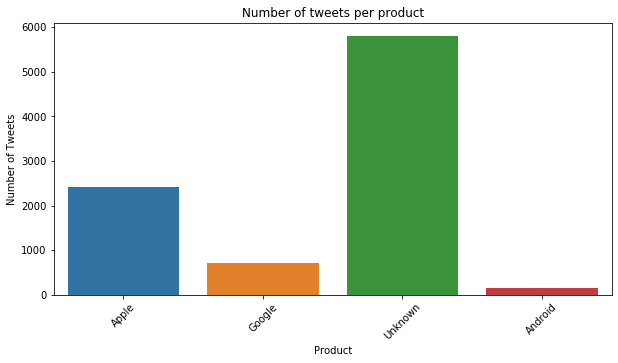

In [10]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='product_agg', data=df, )
chart.set_xticklabels(labels=['Apple','Google','Unknown','Android'], rotation=45);
chart.set_xlabel('Product');
chart.set_ylabel('Number of Tweets');
chart.set_title('Number of tweets per product');

#### Unknown category still the majority

#### Calculating mean and median sentiment scores by aggregated product categories below.

In [11]:
df.head()

,tweet,product_,emotion,lemmatizer_tweets,textblob_polarity,textblob_subjectivity,vs_neg,vs_neu,vs_pos,vs_compound,product_agg
0,"['wesley83', 'have', '3G', 'iPhone', '3', 'hrs...",iPhone,0,wesley83 have 3G iPhone 3 hr tweeting RISE Aus...,-0.200000,0.400000,0.223,0.777,0.000,-0.6486,Apple
1,"['jessedee', 'Know', 'fludapp', 'Awesome', 'iP...",iPad or iPhone App,1,jessedee Know fludapp Awesome iPad iPhone app ...,0.466667,0.933333,0.000,0.528,0.472,0.9100,Apple
2,"['swonderlin', 'not', 'wait', 'iPad', '2', 'al...",iPad,1,swonderlin not wait iPad 2 also should sale do...,-0.155556,0.288889,0.000,1.000,0.000,0.0000,Apple
3,"['sxsw', 'hope', 'year', 'festival', 't', 'cra...",iPad or iPhone App,0,sxsw hope year festival t crashy this year iPh...,0.000000,0.000000,0.000,0.596,0.404,0.7269,Apple
4,"['sxtxstate', 'great', 'stuff', 'Fri', 'SXSW',...",Google,1,sxtxstate great stuff Fri SXSW Marissa Mayer G...,0.800000,0.750000,0.000,0.796,0.204,0.6249,Google


In [12]:
def bivar_analyzer(sent_met):
    apple = df.loc[df['product_agg'] == 'Apple', sent_met]
    google = df.loc[df['product_agg'] == 'Google', sent_met]
    android = df.loc[df['product_agg'] == 'Android', sent_met]
    unknown = df.loc[df['product_agg'] == 'Unknown', sent_met]
    
    a = df.groupby(['product_agg'])[sent_met].mean()
    print(f'Mean {sent_met} by product')
    print(a)
    print(sp.f_oneway(apple, google, android, unknown))
    print(f'Median {sent_met} by product')
    print(df.groupby(['product_agg'])[sent_met].median())
    print(sp.kruskal(apple, google, android, unknown))
    
    plt.figure(figsize=(10,5))
    chart = sns.barplot(x=a.index,y=a, data=df, )
    chart.set_xticklabels(labels=a.index, rotation=45);
    chart.set_xlabel('Product');
    chart.set_ylabel(f'Mean {sent_met}');
    chart.set_title(f'Mean {sent_met} by product');

#### polarity ranges from -1 to 1.  Positive values are positive sentiment

Mean textblob_polarity by product
product_agg
Android    0.240113
Apple      0.183993
Google     0.187189
Unknown    0.103194
Name: textblob_polarity, dtype: float64
F_onewayResult(statistic=72.66119770092284, pvalue=1.9599549661549273e-46)
Median textblob_polarity by product
product_agg
Android    0.200000
Apple      0.125000
Google     0.136364
Unknown    0.000000
Name: textblob_polarity, dtype: float64
KruskalResult(statistic=258.86652105012877, pvalue=7.906699745660572e-56)


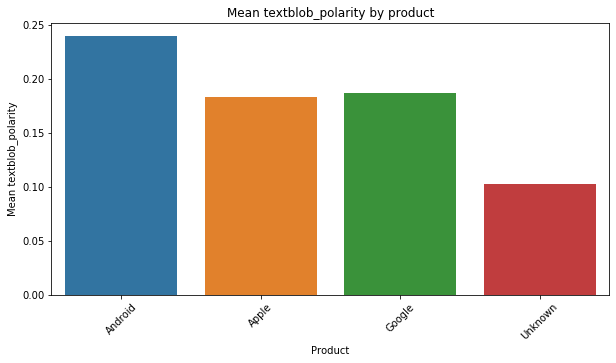

In [13]:
bivar_analyzer('textblob_polarity')

#### Subjectivity rates whether the message expresses a personal opinion (1) or factual information (0).  

Mean textblob_subjectivity by product
product_agg
Android    0.434576
Apple      0.403356
Google     0.400306
Unknown    0.292621
Name: textblob_subjectivity, dtype: float64
F_onewayResult(statistic=92.22118718008055, pvalue=8.661170289683443e-59)
Median textblob_subjectivity by product
product_agg
Android    0.475000
Apple      0.450000
Google     0.408333
Unknown    0.260606
Name: textblob_subjectivity, dtype: float64
KruskalResult(statistic=278.0070410776856, pvalue=5.715574003960698e-60)


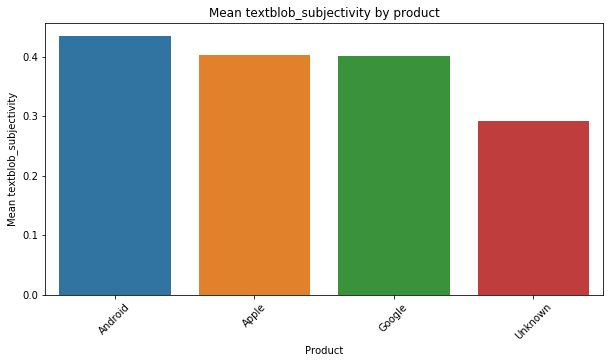

In [14]:
bivar_analyzer('textblob_subjectivity')

Mean vs_neg by product
product_agg
Android    0.025572
Apple      0.042899
Google     0.031533
Unknown    0.030386
Name: vs_neg, dtype: float64
F_onewayResult(statistic=15.167096905650649, pvalue=7.644024880781393e-10)
Median vs_neg by product
product_agg
Android    0.0
Apple      0.0
Google     0.0
Unknown    0.0
Name: vs_neg, dtype: float64
KruskalResult(statistic=52.39334429331721, pvalue=2.4692885033332857e-11)


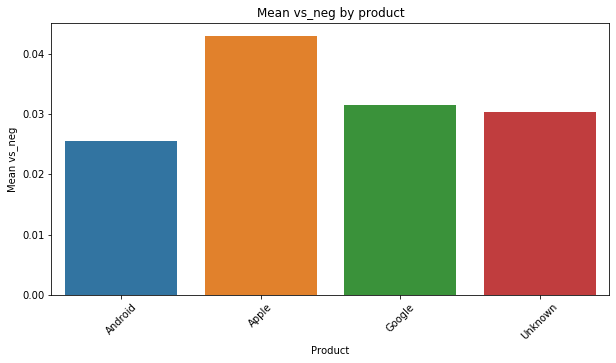

In [15]:
bivar_analyzer('vs_neg')

Mean vs_neu by product
product_agg
Android    0.755711
Apple      0.796999
Google     0.792346
Unknown    0.868360
Name: vs_neu, dtype: float64
F_onewayResult(statistic=167.25803152036718, pvalue=1.5282622371613551e-105)
Median vs_neu by product
product_agg
Android    0.778
Apple      0.795
Google     0.796
Unknown    0.890
Name: vs_neu, dtype: float64
KruskalResult(statistic=476.93925175452216, pvalue=4.74282078425606e-103)


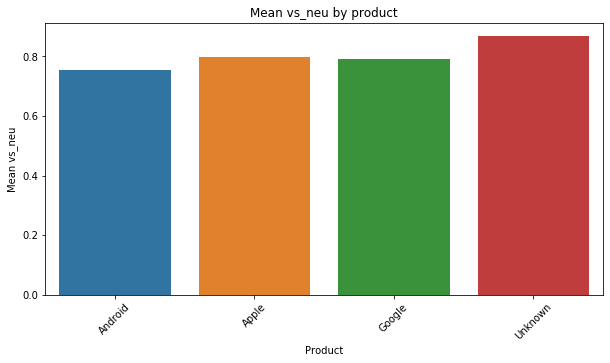

In [16]:
bivar_analyzer('vs_neu')

Mean vs_pos by product
product_agg
Android    0.218717
Apple      0.160098
Google     0.176119
Unknown    0.101251
Name: vs_pos, dtype: float64
F_onewayResult(statistic=155.76177500552683, pvalue=1.9039433405980362e-98)
Median vs_pos by product
product_agg
Android    0.203
Apple      0.156
Google     0.167
Unknown    0.000
Name: vs_pos, dtype: float64
KruskalResult(statistic=440.44618466655436, pvalue=3.829970213407436e-95)


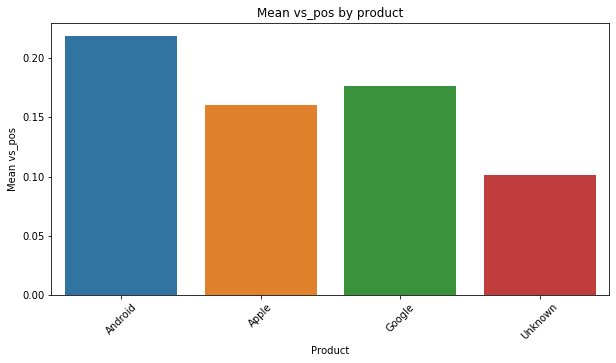

In [17]:
bivar_analyzer('vs_pos')

Mean vs_compound by product
product_agg
Android    0.375961
Apple      0.259765
Google     0.310995
Unknown    0.158427
Name: vs_compound, dtype: float64
F_onewayResult(statistic=82.77447302183036, pvalue=7.873614179286613e-53)
Median vs_compound by product
product_agg
Android    0.4404
Apple      0.3182
Google     0.3818
Unknown    0.0000
Name: vs_compound, dtype: float64
KruskalResult(statistic=269.0005657016715, pvalue=5.07798680791687e-58)


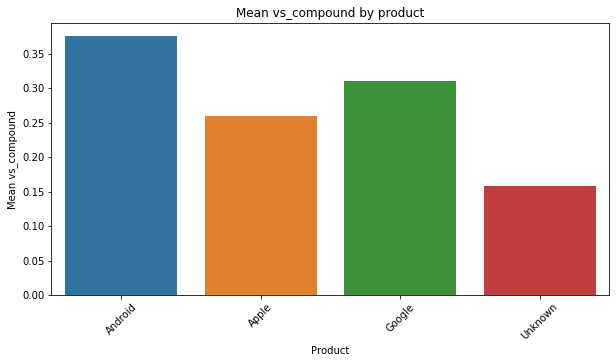

In [18]:
bivar_analyzer('vs_compound')

#### Getting all the neg, neu and pos for each product on one graph - use sns.barplot with hue - need to reshape to plot mean value by product with the hue set to the appropriate valence. 

In [19]:
a = df.groupby(['product_agg'])['vs_neg'].mean()
b = df.groupby(['product_agg'])['vs_neu'].mean()
c = df.groupby(['product_agg'])['vs_pos'].mean()

In [20]:
vs_neg = pd.DataFrame(data=a)
vs_neg['metric'] = 'VS negative'
vs_neg.rename(columns={"vs_neg":"mean_rating"},inplace=True)
vs_neg.reset_index(inplace=True)

vs_neu = pd.DataFrame(data=b)
vs_neu['metric'] = 'VS neutral'
vs_neu.rename(columns={"vs_neu":"mean_rating"},inplace=True)
vs_neu.reset_index(inplace=True)

vs_pos = pd.DataFrame(data=c)
vs_pos['metric'] = 'VS positive'
vs_pos.rename(columns={"vs_pos":"mean_rating"},inplace=True)
vs_pos.reset_index(inplace=True)

In [21]:
intermediate = vs_neg.merge(vs_neu, how='outer')

In [22]:
stacked = intermediate.merge(vs_pos, how='outer')

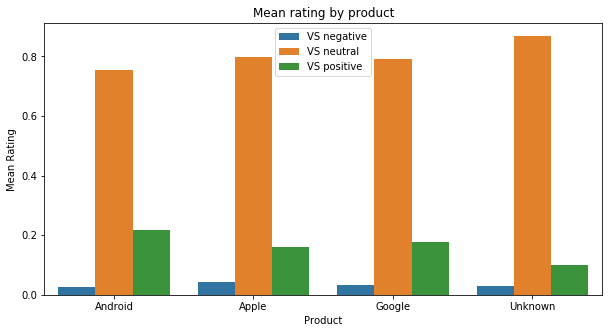

In [23]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x="product_agg", y="mean_rating", hue="metric", data=stacked)
chart.set_xlabel('Product');
chart.set_ylabel('Mean Rating');
chart.set_title('Mean rating by product')
chart.legend(loc='best');

#### Generally speaking android was getting the most positive reviews and apple the most negative reviews.  Since apple had a lot of subcategories will look at those.

In [24]:
df_apple = df.loc[df['product_agg'] == 'Apple',:]

In [25]:
df['product_'].value_counts()

Unknown                            5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: product_, dtype: int64

Mean VS neg by apple product
product_
Apple                             0.038233
Other Apple product or service    0.043343
iPad                              0.042960
iPad or iPhone App                0.029857
iPhone                            0.073673
Name: vs_neg, dtype: float64
F_onewayResult(statistic=14.939143039082458, pvalue=1.326413349889096e-09)
Median VS neg by apple product
product_
Apple                             0.0
Other Apple product or service    0.0
iPad                              0.0
iPad or iPhone App                0.0
iPhone                            0.0
Name: vs_neg, dtype: float64
KruskalResult(statistic=41.589478040156365, pvalue=4.903213939772419e-09)


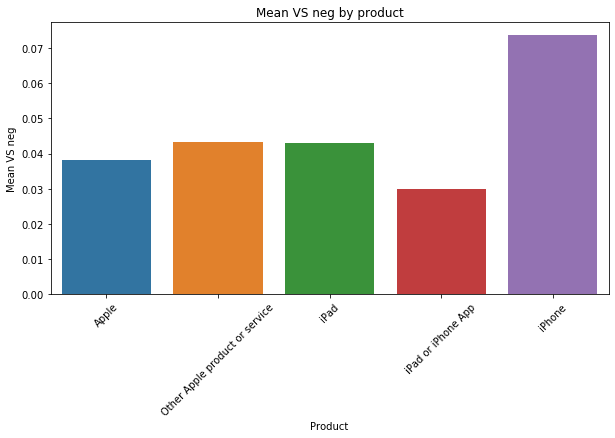

In [26]:
iPad = df_apple.loc[df_apple['product_'] == 'iPad', 'vs_neg']
apple_app = df_apple.loc[df_apple['product_'] == 'iPad or iPhone App', 'vs_neg']
iPhone = df_apple.loc[df_apple['product_'] == 'iPhone', 'vs_neg']
Other_apple = df_apple.loc[df_apple['product_'] == 'Other Apple product or service', 'vs_neg']

a = df_apple.groupby(['product_'])['vs_neg'].mean()
print('Mean VS neg by apple product')
print(a)
print(sp.f_oneway(iPad, apple_app, iPhone, Other_apple))
print('Median VS neg by apple product')
print(df_apple.groupby(['product_'])['vs_neg'].median())
print(sp.kruskal(iPad, apple_app, iPhone, Other_apple))

plt.figure(figsize=(10,5))
chart = sns.barplot(x=a.index,y=a, data=df_apple, )
chart.set_xticklabels(labels=a.index, rotation=45);
chart.set_xlabel('Product');
chart.set_ylabel('Mean VS neg');
chart.set_title('Mean VS neg by product');

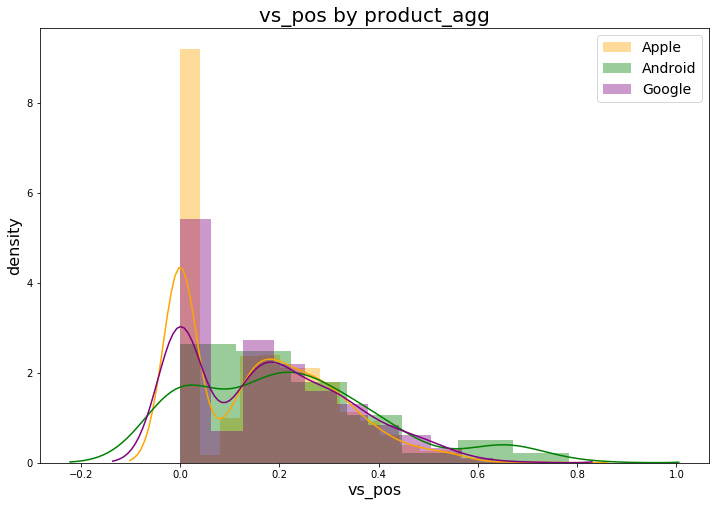

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['vs_pos'][df['product_agg'] == 'Apple'], label='Apple', color='orange');
ax = sns.distplot(df['vs_pos'][df['product_agg'] =='Android'], label='Android', color='green');
ax = sns.distplot(df['vs_pos'][df['product_agg'] == 'Google'], label='Google', color='purple');
ax.set_title('vs_pos by product_agg', fontsize=20);
ax.set_ylabel('density', fontsize=16);
ax.set_xlabel('vs_pos', fontsize=16);
ax.legend(prop=dict(size=14));

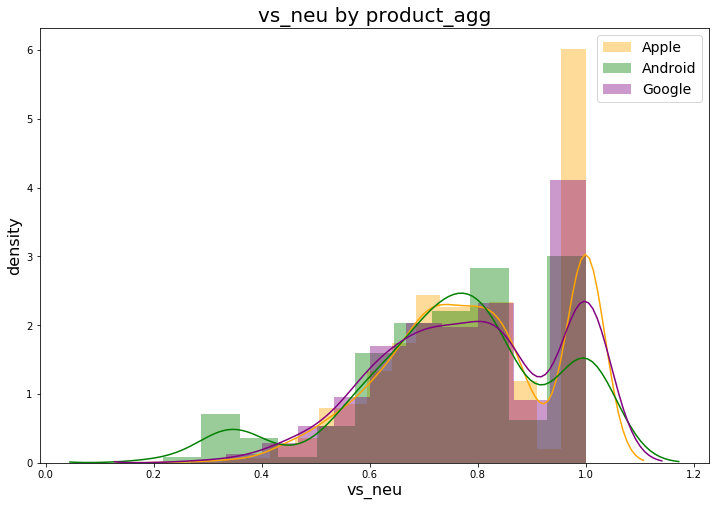

In [28]:
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['vs_neu'][df['product_agg'] == 'Apple'], label='Apple', color='orange');
ax = sns.distplot(df['vs_neu'][df['product_agg'] =='Android'], label='Android', color='green');
ax = sns.distplot(df['vs_neu'][df['product_agg'] == 'Google'], label='Google', color='purple');
ax.set_title('vs_neu by product_agg', fontsize=20);
ax.set_ylabel('density', fontsize=16);
ax.set_xlabel('vs_neu', fontsize=16);
ax.legend(prop=dict(size=14));

In [62]:
kde_dict = {'bw': .0000001}

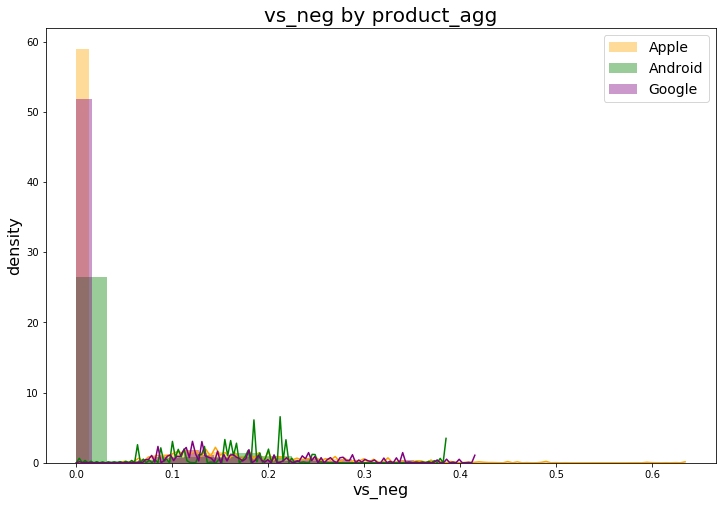

In [63]:
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['vs_neg'][df['product_agg'] == 'Apple'], label='Apple', color='orange', kde_kws=kde_dict);
ax = sns.distplot(df['vs_neg'][df['product_agg'] =='Android'], label='Android', color='green', kde_kws=kde_dict);
ax = sns.distplot(df['vs_neg'][df['product_agg'] == 'Google'], label='Google', color='purple', kde_kws=kde_dict);
ax.set_title('vs_neg by product_agg', fontsize=20);
ax.set_ylabel('density', fontsize=16);
ax.set_xlabel('vs_neg', fontsize=16);
ax.legend(prop=dict(size=14));

### Creating figures of word counts overall and by product and valence

There was something going on with the format of previous tokenization and lemmatization - couldn't get the column into a flat list for counting.  Here taking the original tweet column and merging with the dataset with the valences and aggregated product categories for subsetting.  Function below includes tokenization, stop word removal, casing and lemmatization.

In [ ]:
df_original = pd.read_csv('data/tweets.csv', encoding = "ISO-8859-1")
df_original.tail()

In [ ]:
# rename columns
df_original.rename(columns ={'tweet_text': 'tweet_original'}, 
                   inplace = True)

In [ ]:
df_tweet = df_original['tweet_original']
df_tweet.dropna(inplace=True)

In [ ]:
pd.options.display.max_rows = 9100

In [ ]:
df_original['tweet_original']

In [ ]:
df_full = df.merge(df_tweet, left_index=True, right_index=True)

In [ ]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string, re
string.punctuation

In [ ]:
## setting stopwords and punctuations
stop_words=stopwords.words("english")
stop_words += list(string.punctuation)
stop_words += ['...','u','w','2',"i'm",'via',"we're",'6','3','hey']
# print(stop_words)
sw_set = set(stop_words)
# sw_set

In [ ]:
def process_tweet(tweet):
    tokenizer = RegexpTokenizer(r"(iPad\s2|[a-zA-Z0-9-]+'?\w+)")

    tokens = tokenizer.tokenize(tweet)
    sw_removed = [token.lower().replace(" ","") for token in tokens if token.lower() not in sw_set]
    return sw_removed

In [ ]:
#I want to get word counts for lots of subsets of the data (by product and valence)
#input should be the original df['tweet'] already subset
#it's df_full['tweet_original']
def word_count_func(data):
    #using the process_tweet function to tokenize, lower and remove stopwords
    process_data = list(map(process_tweet, data))
    
    #lemmatizing words
    from nltk.stem import WordNetLemmatizer 
      
    #instantiating
    lemmatizer = WordNetLemmatizer() 

    #process_data is a list of lists - here looping over the lists and then the words in the list
    lemmatizer_tweets=[]
    for l in process_data:
        new_row = []
        for w in l:
            new_row.append(lemmatizer.lemmatize(w))
        lemmatizer_tweets.append(new_row)   
    
    #This is more descriptive info - calculating the unique vocab of the subset
    overall_lem_vocab = set()
    for tweet in lemmatizer_tweets:
        overall_lem_vocab.update(tweet)
    print(f'Overall vocab of subset: {len(overall_lem_vocab)}')

    #Flattening (going from a list of lists to one single list) the lemmatized tweets for freq
    flat_lemmatizer_tweets = [item for sublist in lemmatizer_tweets for item in sublist]
    
    #applying nltk freqdist function to the flat list
    lem_freq = FreqDist(flat_lemmatizer_tweets)
    print('30 most common words in subset:')
    print(lem_freq.most_common(30))
    
    #returning normalized word freq because there are different N's
    total_words = sum(lem_freq.values())
    top_30 = lem_freq.most_common(30)
    print("Word \t\t Normalized Frequency")
    print()
    for word in top_30:
        normalized_frequency = word[1]/total_words
        print("{} \t\t {:.4}".format(word[0], normalized_frequency))
        
    #Creating word clouds - input is a dict with key word value num of occurences 
    word_dict = dict(top_30)
    from wordcloud import WordCloud
    wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(word_dict)
    
    # Display the generated image w/ matplotlib:

    plt.figure(figsize=(10,10), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
data1 = df_full['tweet_original']
word_count_func(data1)

In [ ]:
df_full['product_agg'].value_counts()

In [ ]:
data_apple = df_full.loc[df_full['product_agg'] == 'Apple','tweet_original']
word_count_func(data_apple)

In [ ]:
data_android = df_full.loc[df_full['product_agg'] == 'Android','tweet_original']
word_count_func(data_android)

In [ ]:
data_google = df_full.loc[df_full['product_agg'] == 'Google','tweet_original']
word_count_func(data_google)

In [ ]:
data_unknown = df_full.loc[df_full['product_agg'] == 'Unknown','tweet_original']
word_count_func(data_unknown)

## Summary of output:
At a bit of a loss how to interpret this. SXSW was the most frequent for all products - obviously tweets were from SXSW.  But there is no (eyeball level) specificity in terms. 

### Assessing word frequency for valence

In [ ]:
df_full.columns

In [ ]:
df_full['vs_neg'].describe()

In [ ]:
#arbitrarily chose vs_neg score of greater than or equal to 0.50 - corresponds to proportion
#of the tweet that is negative 
data_neg = df_full.loc[df_full['vs_neg'] >= 0.5,'tweet_original']
word_count_func(data_neg)

In [ ]:
#0.5 seems really small
data_neg2 = df_full.loc[df_full['vs_neg'] >= 0.4,'tweet_original']
word_count_func(data_neg2)

In [ ]:
data_pos = df_full.loc[df_full['vs_pos'] >= 0.5,'tweet_original']
word_count_func(data_pos)

In [ ]:
data_pos2 = df_full.loc[df_full['vs_pos'] >= 0.6 ,'tweet_original']
word_count_func(data_pos2)

## Summary 
More info with the valence categries:
* Overall - assuming SXSW and mention were used in all tweets about the festival
* negative >= 0.5.  Looks like people were complaining about hotspots/internet, check-in, tool/mobile(maybe the mobile site or another tool), restaurants, experimenting/tinkering (I think they wanted to play with the toys and didn't get to).  "viewed, explorer and mayer" were highly frequent.  Unsure what these refer to.
* positive >= 0.6.  'Link' and 'rt' are high - assuming people are linking to or retweeting new products they like.  I would infer general excitment for the various products from "being in 'line' 'today'/'tomorrow' 'launch' and the product names". And general thanks/congrats for "seeing/meeting" someone potentially at a 'party'


## Creating termite plot for products and valence

In [ ]:
def termite_word_count_func(data):
    #using the process_tweet function to tokenize, lower and remove stopwords
    process_data = list(map(process_tweet, data))
    
    #lemmatizing words
    from nltk.stem import WordNetLemmatizer 
      
    #instantiating
    lemmatizer = WordNetLemmatizer() 

    #process_data is a list of lists - here looping over the lists and then the words in the list
    lemmatizer_tweets=[]
    for l in process_data:
        new_row = []
        for w in l:
            new_row.append(lemmatizer.lemmatize(w))
        lemmatizer_tweets.append(new_row)   
    
    #This is more descriptive info - calculating the unique vocab of the subset
    overall_lem_vocab = set()
    for tweet in lemmatizer_tweets:
        overall_lem_vocab.update(tweet)
#     print(f'Overall vocab of subset: {len(overall_lem_vocab)}')

    #Flattening (going from a list of lists to one single list) the lemmatized tweets for freq
    flat_lemmatizer_tweets = [item for sublist in lemmatizer_tweets for item in sublist]
    
    #applying nltk freqdist function to the flat list
    lem_freq = FreqDist(flat_lemmatizer_tweets)
#     print('30 most common words in subset:')
#     print(lem_freq.most_common(30))
    
    #returning normalized word freq because there are different N's
    total_words = sum(lem_freq.values())
    top_30 = lem_freq.most_common(30)
#     print("Word \t\t Normalized Frequency")
#     print()
    top_30_words = []
    for word in top_30:
        normalized_frequency = word[1]/total_words
        top_30_words.append((word[0], normalized_frequency))
    return top_30_words

In [ ]:
#convert tuple to dictionary
def Convert(tup):
    di = {}
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di

### Create tuples for overall, apple, google, android, pos and neg labels

In [ ]:
#Getting tuple of normalized word frequency on full dataste
data1 = df_full['tweet_original']
main_tuple = termite_word_count_func(data1)

In [ ]:
data_apple = df_full.loc[df_full['product_agg']=='Apple','tweet_original']
apple_tuple = termite_word_count_func(data_apple)

In [ ]:
data_google = df_full.loc[df_full['product_agg']=='Google','tweet_original']
google_tuple = termite_word_count_func(data_google)

In [ ]:
data_android = df_full.loc[df_full['product_agg']=='Android','tweet_original']
android_tuple = termite_word_count_func(data_android)

In [ ]:
data_neg = df_full.loc[df_full['emotion']==0,'tweet_original']
neg_tuple = termite_word_count_func(data_neg)

In [ ]:
data_pos = df_full.loc[df_full['emotion']==1,'tweet_original']
pos_tuple = termite_word_count_func(data_pos)

In [ ]:
tuples_list = [main_tuple,apple_tuple,google_tuple,android_tuple,neg_tuple,pos_tuple]


In [ ]:
#Converting tuple to dictionary
dict_list = []
for tuple_ in tuples_list:
    x = Convert(tuple_)
    dict_list.append(x)
# main_tuple_dict = Convert(main_tuple)
# apple_tuple_dict = Convert(apple_tuple)
# google_tuple_dict = Convert(google_tuple)
# android_tuple_dict = Convert(android_tuple)
# negative_tuple_dict = Convert(neg_tuple)
# positive_tuple_dict = Convert(pos_tuple)
# dict_list.append(main_tuple_dict)

In [ ]:
dict_list[0]['sxsw'][0]

In [ ]:
overall_new = []
for i in range(len(dict_list)):
    new_dict_list = {}
    for key, value in dict_list[i].items():
        new_dict_list[key] = value[0]
    overall_new.append(new_dict_list)
overall_new

In [ ]:
termite_df = pd.DataFrame(overall_new)
termite_df

In [ ]:
termite_df.fillna(0,inplace=True)

In [ ]:
transpose_termite_df = termite_df.T

In [ ]:
transpose_termite_df.rename(columns={0:'Overall',
                                     1:'Apple',
                                    2:'Google',
                                    3:'Android',
                                    4:'Negative',
                                    5:'Positive'}, inplace=True)

In [ ]:
transpose_termite_df

In [ ]:
mat = transpose_termite_df.to_numpy()

In [ ]:
mat

In [ ]:
col_names = list(transpose_termite_df.columns)

In [ ]:
words = list(transpose_termite_df.index)

In [ ]:
from textacy.viz.termite import draw_termite_plot

In [ ]:
draw_termite_plot(mat,col_names,words,highlight_cols=range(0,5))
